In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [16,10]
%matplotlib inline

In [2]:
data = pd.read_csv('cleaned_new.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38398 entries, 0 to 38397
Columns: 120 entries, Unnamed: 0 to test
dtypes: float64(99), int64(9), object(12)
memory usage: 35.2+ MB


/home/ankish/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16,31,46,64,76,86,108,118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Unnamed: 0,1:1_Meeting_0,1:1_Meeting_1,1:1_Meeting_10,1:1_Meeting_11,1:1_Meeting_2,1:1_Meeting_3,1:1_Meeting_4,1:1_Meeting_5,1:1_Meeting_6,...,View_Peer_3,View_Peer_4,View_Peer_5,View_Peer_6,View_Peer_7,View_Peer_8,View_Peer_9,View_Peer_Last120_Flag(Y/N),target,test
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Y,Retained,4
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y,Dropped,4
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,Retained,4
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Y,Retained,4
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,N,Dropped,4


In [4]:
data = data.drop(['target','Multi-Year In','Unnamed: 0'],axis=1)

In [9]:
data = data[:31487]

In [10]:
for i,dtype in enumerate(data.dtypes):
#     print(i,dtype)
    if dtype == 'object':
        print(i)

15
30
39
45
54
62
74
84
96
106
115


In [11]:
list = [16,31,40,46,55,63,75,85,97,107,116]
col_name_list = []
for i in list:
    print(data.columns[i-1])
    col_name_list.append(data.columns[i-1])

Conference_Attended_11
Document_Read_12
Document_Read_Last120_Flag (Y/N)
Inquiry_Done_12
Inquiry_Done_Last120_Flag (Y/N)
Service_desk_call_11
Symposium_Attended_11
Testimonial_0
Testimonial_Flag(Y/N)
View_Peer_12
View_Peer_Last120_Flag(Y/N)


In [12]:
for col_name in col_name_list:
    print("*"*40)
    print(data[col_name].unique())

****************************************
[0.0 1.0 2.0 '0' '1' 'N']
****************************************
[0.0 11.0 10.0 12.0 44.0 3.0 4.0 31.0 39.0 29.0 35.0 7.0 57.0 8.0 28.0 1.0
 48.0 36.0 22.0 2.0 18.0 17.0 5.0 6.0 14.0 107.0 15.0 37.0 23.0 27.0 60.0
 9.0 56.0 13.0 86.0 20.0 63.0 33.0 61.0 177.0 19.0 43.0 26.0 78.0 25.0
 93.0 16.0 50.0 90.0 41.0 21.0 65.0 42.0 47.0 96.0 34.0 30.0 24.0 67.0
 400.0 58.0 32.0 75.0 74.0 45.0 526.0 88.0 314.0 222.0 38.0 68.0 94.0 54.0
 124.0 40.0 46.0 66.0 104.0 140.0 64.0 136.0 52.0 70.0 62.0 230.0 128.0
 126.0 80.0 98.0 170.0 146.0 76.0 132.0 130.0 102.0 154.0 92.0 135.0 152.0
 49.0 123.0 122.0 148.0 250.0 286.0 157.0 316.0 298.0 100.0 72.0 84.0
 232.0 120.0 108.0 71.0 204.0 488.0 220.0 134.0 82.0 680.0 236.0 174.0
 696.0 162.0 288.0 164.0 208.0 332.0 73.0 114.0 178.0 274.0 188.0 169.0
 51.0 87.0 69.0 55.0 53.0 131.0 106.0 91.0 97.0 205.0 89.0 184.0 116.0
 276.0 85.0 142.0 156.0 110.0 118.0 200.0 186.0 105.0 176.0 198.0 304.0
 111.0 112.0 249.0 138.

In [14]:
data['Conference_Attended_11'] =pd.to_numeric(data['Conference_Attended_11'], errors='coerce')
data['Conference_Attended_11'] = data['Conference_Attended_11'].fillna(0)
data['Document_Read_12'] =pd.to_numeric(data['Document_Read_12'], errors='coerce')
data['Document_Read_12'] = data['Document_Read_12'].fillna(0)
data['Inquiry_Done_12'] =pd.to_numeric(data['Inquiry_Done_12'], errors='coerce')
data['Inquiry_Done_12'] = data['Inquiry_Done_12'].fillna(0)
data['Service_desk_call_11'] =pd.to_numeric(data['Service_desk_call_11'], errors='coerce')
data['Service_desk_call_11'] = data['Service_desk_call_11'].fillna(0)
data['Symposium_Attended_11'] =pd.to_numeric(data['Symposium_Attended_11'], errors='coerce')
data['Symposium_Attended_11'] = data['Symposium_Attended_11'].fillna(0)
data['Testimonial_0'] =pd.to_numeric(data['Testimonial_0'], errors='coerce')
data['Testimonial_0'] = data['Testimonial_0'].fillna(0)
data['View_Peer_12'] =pd.to_numeric(data['View_Peer_12'], errors='coerce')
data['View_Peer_12'] = data['View_Peer_12'].fillna(0)

In [15]:
for i,dtype in enumerate(data.dtypes):
#     print(i,dtype)
    if dtype == 'object':
        print(i)

39
54
96
115


In [16]:
list = [40,55,97,116]
col_name_list = []
for i in list:
    print(data.columns[i-1])
    col_name_list.append(data.columns[i-1])

Document_Read_Last120_Flag (Y/N)
Inquiry_Done_Last120_Flag (Y/N)
Testimonial_Flag(Y/N)
View_Peer_Last120_Flag(Y/N)


In [17]:
for col_name in col_name_list:
    print("*"*40)
    print(data[col_name].unique())

****************************************
['Y' 'N' '26' '78']
****************************************
['N' 'Y' '6' '13']
****************************************
['No' 'Yes']
****************************************
['Y' 'N' '9' '10']


In [18]:
data.groupby('Document_Read_Last120_Flag (Y/N)')['Retention Status'].count()

Document_Read_Last120_Flag (Y/N)
26        1
78        1
N      3993
Y     27492
Name: Retention Status, dtype: int64

In [25]:
# print(data[data['Document_Read_Last120_Flag (Y/N)'] == '26' ])
# print(data[data['Document_Read_Last120_Flag (Y/N)'] == '78' ])
# print(data[data['Inquiry_Done_Last120_Flag (Y/N)'] == '6' ])
# print(data[data['Inquiry_Done_Last120_Flag (Y/N)'] == '13' ])
# print(data[data['View_Peer_Last120_Flag(Y/N)'] == '9' ])
# print(data[data['View_Peer_Last120_Flag(Y/N)'] == '10' ])


In [24]:
data = data.drop(data.index[[28832,29432]])

In [26]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
# vendor_train = pd.get_dummies(train1['vendor_id'], 
#                               prefix='vi', prefix_sep='_')
test = pd.get_dummies(data['Document_Read_Last120_Flag (Y/N)'],
                     prefix='test',prefix_sep='_')

In [28]:
doc_flag = pd.get_dummies(data['Document_Read_Last120_Flag (Y/N)'],
                         prefix='doc_read_flag',prefix_sep='_')
inquiry_flag = pd.get_dummies(data['Inquiry_Done_Last120_Flag (Y/N)'],
                         prefix='inquiry_flag',prefix_sep='_')
peer_flag = pd.get_dummies(data['View_Peer_Last120_Flag(Y/N)'],
                         prefix='view_peer_flag',prefix_sep='_')
testimonial_flag = pd.get_dummies(data['Testimonial_Flag(Y/N)'],
                         prefix='testimonial_flag',prefix_sep='_')



In [29]:
data.shape

(31485, 117)

In [30]:
col_list = ['Testimonial_11',
       'Testimonial_10', 'Testimonial_9', 'Testimonial_8', 'Testimonial_7',
       'Testimonial_6', 'Testimonial_5', 'Testimonial_4', 'Testimonial_3',
       'Testimonial_2', 'Testimonial_1', 'Testimonial_0', 
        '1:1_Meeting_11',
       '1:1_Meeting_10', '1:1_Meeting_9', '1:1_Meeting_8', '1:1_Meeting_7',
       '1:1_Meeting_6', '1:1_Meeting_5', '1:1_Meeting_4', '1:1_Meeting_3',
       '1:1_Meeting_2', '1:1_Meeting_1', '1:1_Meeting_0',
        'Symposium_Attended_11', 'Symposium_Attended_10',
       'Symposium_Attended_9', 'Symposium_Attended_8', 'Symposium_Attended_7',
       'Symposium_Attended_6', 'Symposium_Attended_5', 'Symposium_Attended_4',
       'Symposium_Attended_3', 'Symposium_Attended_2', 'Symposium_Attended_1',
       'Symposium_Attended_0',
       'Conference_Attended_11', 'Conference_Attended_10',
       'Conference_Attended_9', 'Conference_Attended_8',
       'Conference_Attended_7', 'Conference_Attended_6',
       'Conference_Attended_5', 'Conference_Attended_4',
       'Conference_Attended_3', 'Conference_Attended_2',
       'Conference_Attended_1', 'Conference_Attended_0',
        'Service_desk_call_11', 'Service_desk_call_10', 'Service_desk_call_9',
       'Service_desk_call_8', 'Service_desk_call_7', 'Service_desk_call_6',
       'Service_desk_call_5', 'Service_desk_call_4', 'Service_desk_call_3',
       'Service_desk_call_2', 'Service_desk_call_1', 'Service_desk_call_0',
        'Inquiry_Done_12', 'Inquiry_Done_11', 'Inquiry_Done_10',
       'Inquiry_Done_9', 'Inquiry_Done_8', 'Inquiry_Done_7', 'Inquiry_Done_6',
       'Inquiry_Done_5', 'Inquiry_Done_4', 'Inquiry_Done_3', 'Inquiry_Done_2',
       'Inquiry_Done_1', 'Inquiry_Done_0',
        'View_Peer_12', 'View_Peer_11',
       'View_Peer_10', 'View_Peer_9', 'View_Peer_8', 'View_Peer_7',
       'View_Peer_6', 'View_Peer_5', 'View_Peer_4', 'View_Peer_3',
       'View_Peer_2', 'View_Peer_1', 'View_Peer_0',
        'Document_Read_12',
       'Document_Read_11', 'Document_Read_10', 'Document_Read_9',
       'Document_Read_8', 'Document_Read_7', 'Document_Read_6',
       'Document_Read_5', 'Document_Read_4', 'Document_Read_3',
       'Document_Read_2', 'Document_Read_1', 'Document_Read_0',]

In [34]:
len(col_list)

99

In [31]:
a = data.isnull().sum()
col_index_list = []
for index,ai in enumerate(a):
    if ai is not 0:
        print(index,ai)
        col_index_list.append(index)

In [72]:
start = 0
t = 0

Testimonial_11


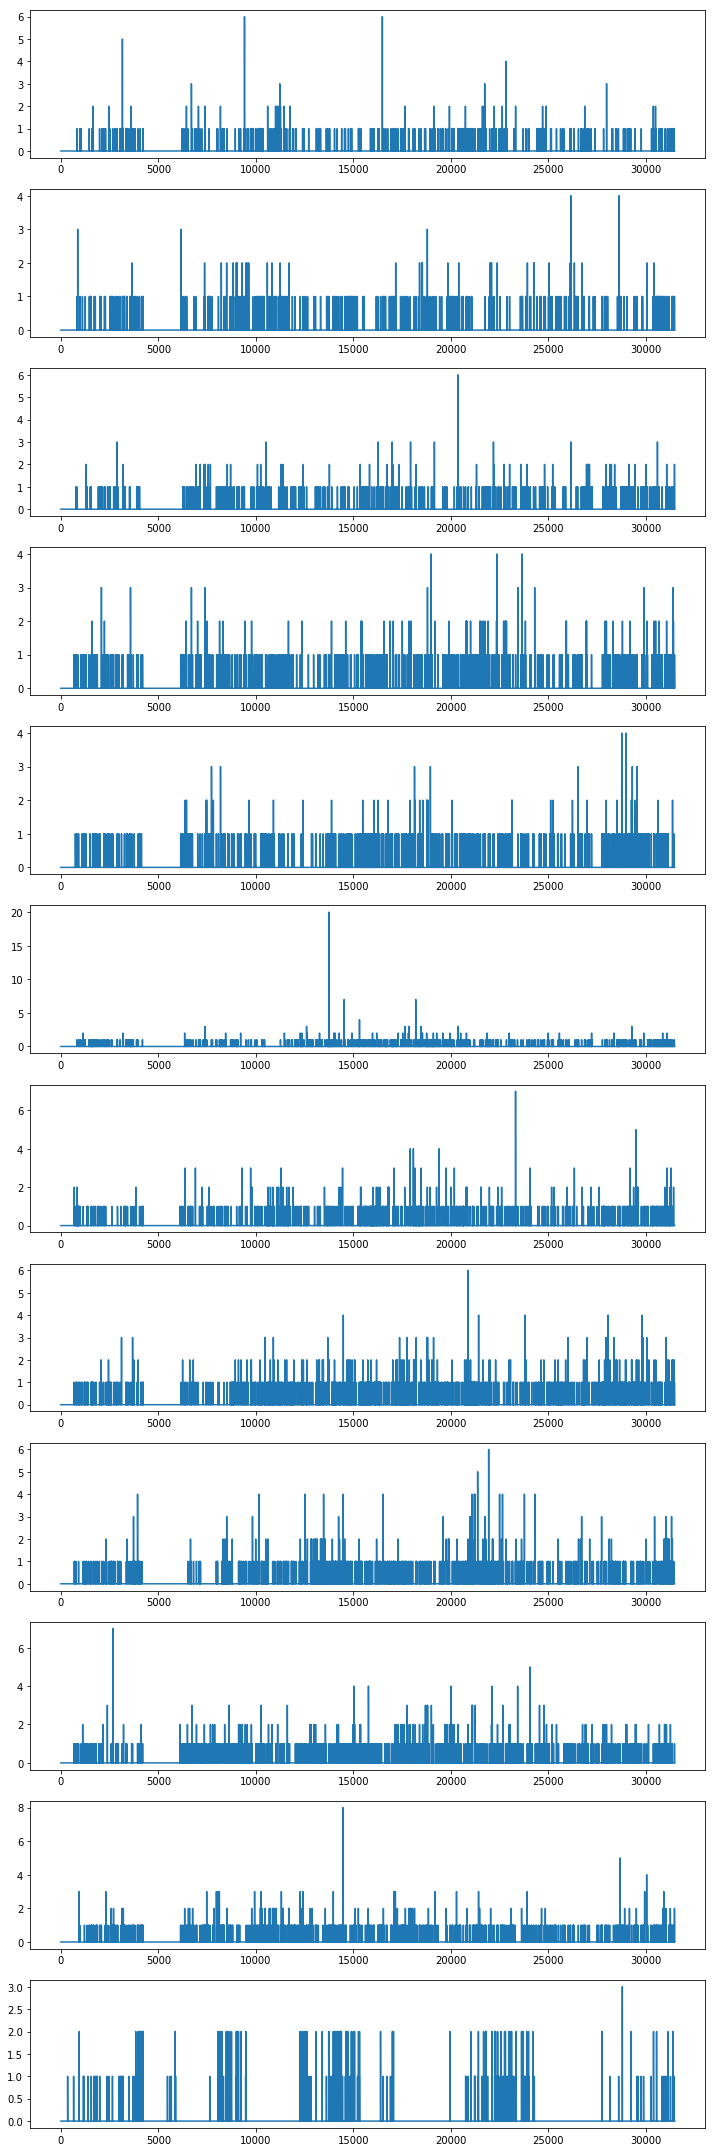

In [73]:
print(col_list[t])
fig,ax = plt.subplots(nrows=12,ncols=1,figsize=(10,30))
t = start
for i in range(12):
#         temp = data.groupby(col_list[start:start+12][t])['Retention Status'].mean()
#     print("*"*25)
#     print(temp)
#     sns.distplot(data[col_list[t]],ax=ax[i])#[i%4][j%3])
    ax[i].plot(data[col_list[t]])
    t += 1
plt.tight_layout()
plt.show()
start = t

1:1_Meeting_11


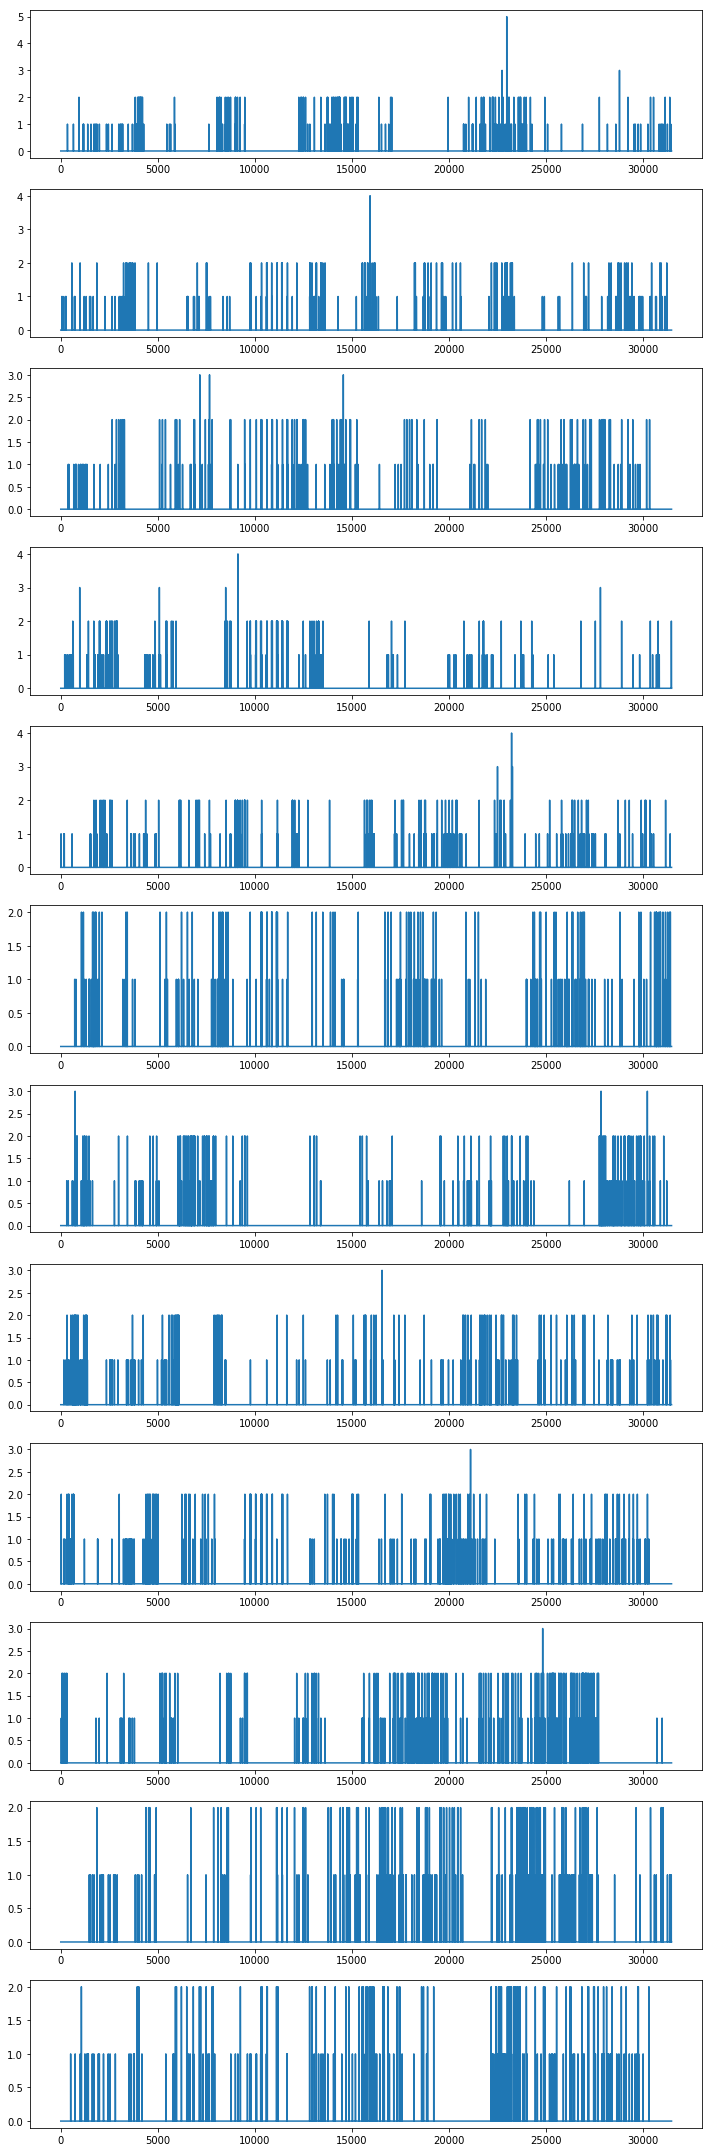

In [74]:
print(col_list[t])
fig,ax = plt.subplots(nrows=12,ncols=1,figsize=(10,30))
t = start
for i in range(12):
#         temp = data.groupby(col_list[start:start+12][t])['Retention Status'].mean()
#     print("*"*25)
#     print(temp)
#     sns.distplot(data[col_list[t]],ax=ax[i])#[i%4][j%3])
    ax[i].plot(data[col_list[t]])
    t += 1
plt.tight_layout()
plt.show()
start = t

Symposium_Attended_11


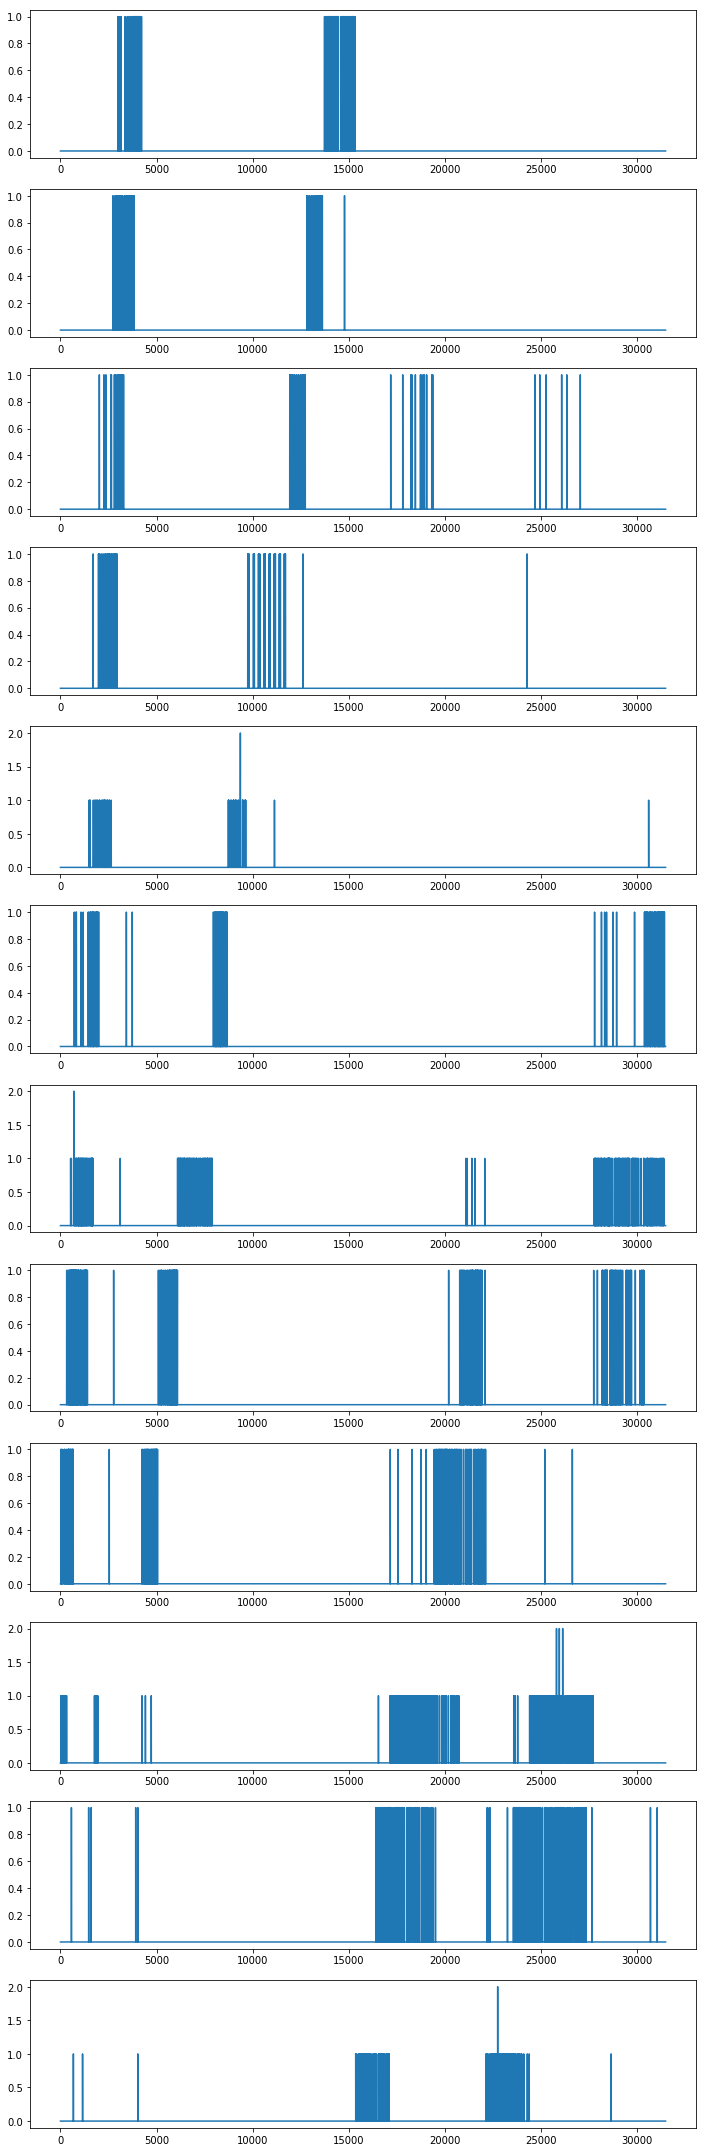

In [75]:
print(col_list[t])
fig,ax = plt.subplots(nrows=12,ncols=1,figsize=(10,30))
t = start
for i in range(12):
#         temp = data.groupby(col_list[start:start+12][t])['Retention Status'].mean()
#     print("*"*25)
#     print(temp)
#     sns.distplot(data[col_list[t]],ax=ax[i])#[i%4][j%3])
    ax[i].plot(data[col_list[t]])
    t += 1
plt.tight_layout()
plt.show()
start = t

Conference_Attended_11


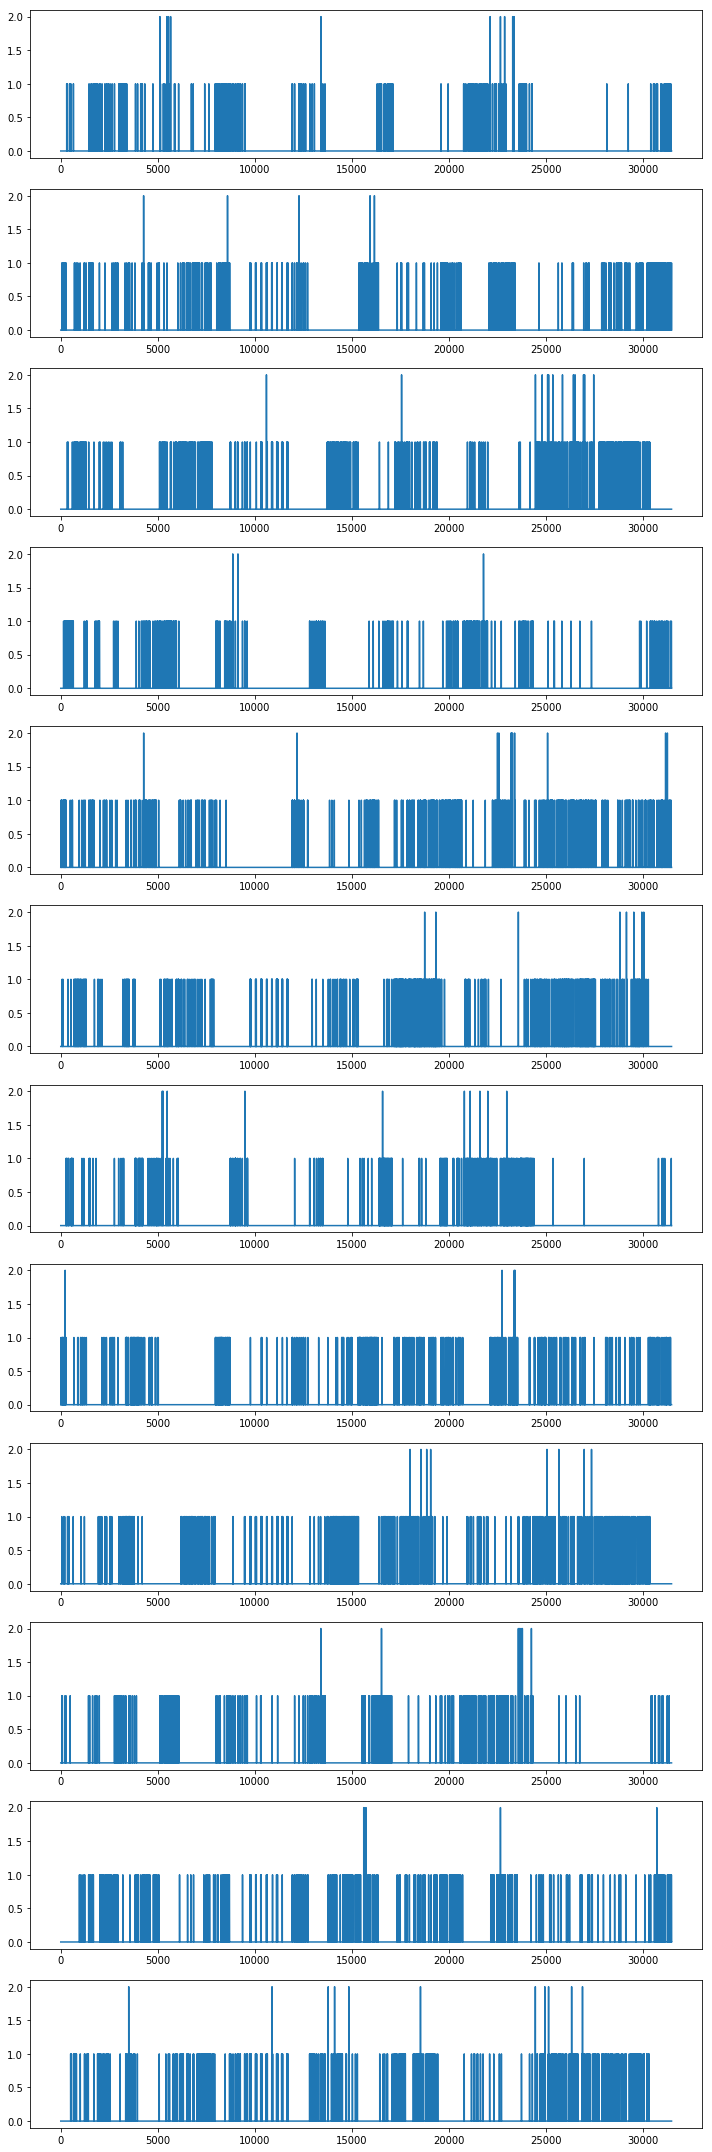

In [76]:
print(col_list[t])
fig,ax = plt.subplots(nrows=12,ncols=1,figsize=(10,30))
t = start
for i in range(12):
#         temp = data.groupby(col_list[start:start+12][t])['Retention Status'].mean()
#     print("*"*25)
#     print(temp)
#     sns.distplot(data[col_list[t]],ax=ax[i])#[i%4][j%3])
    ax[i].plot(data[col_list[t]])
    t += 1
plt.tight_layout()
plt.show()
start = t

Service_desk_call_11


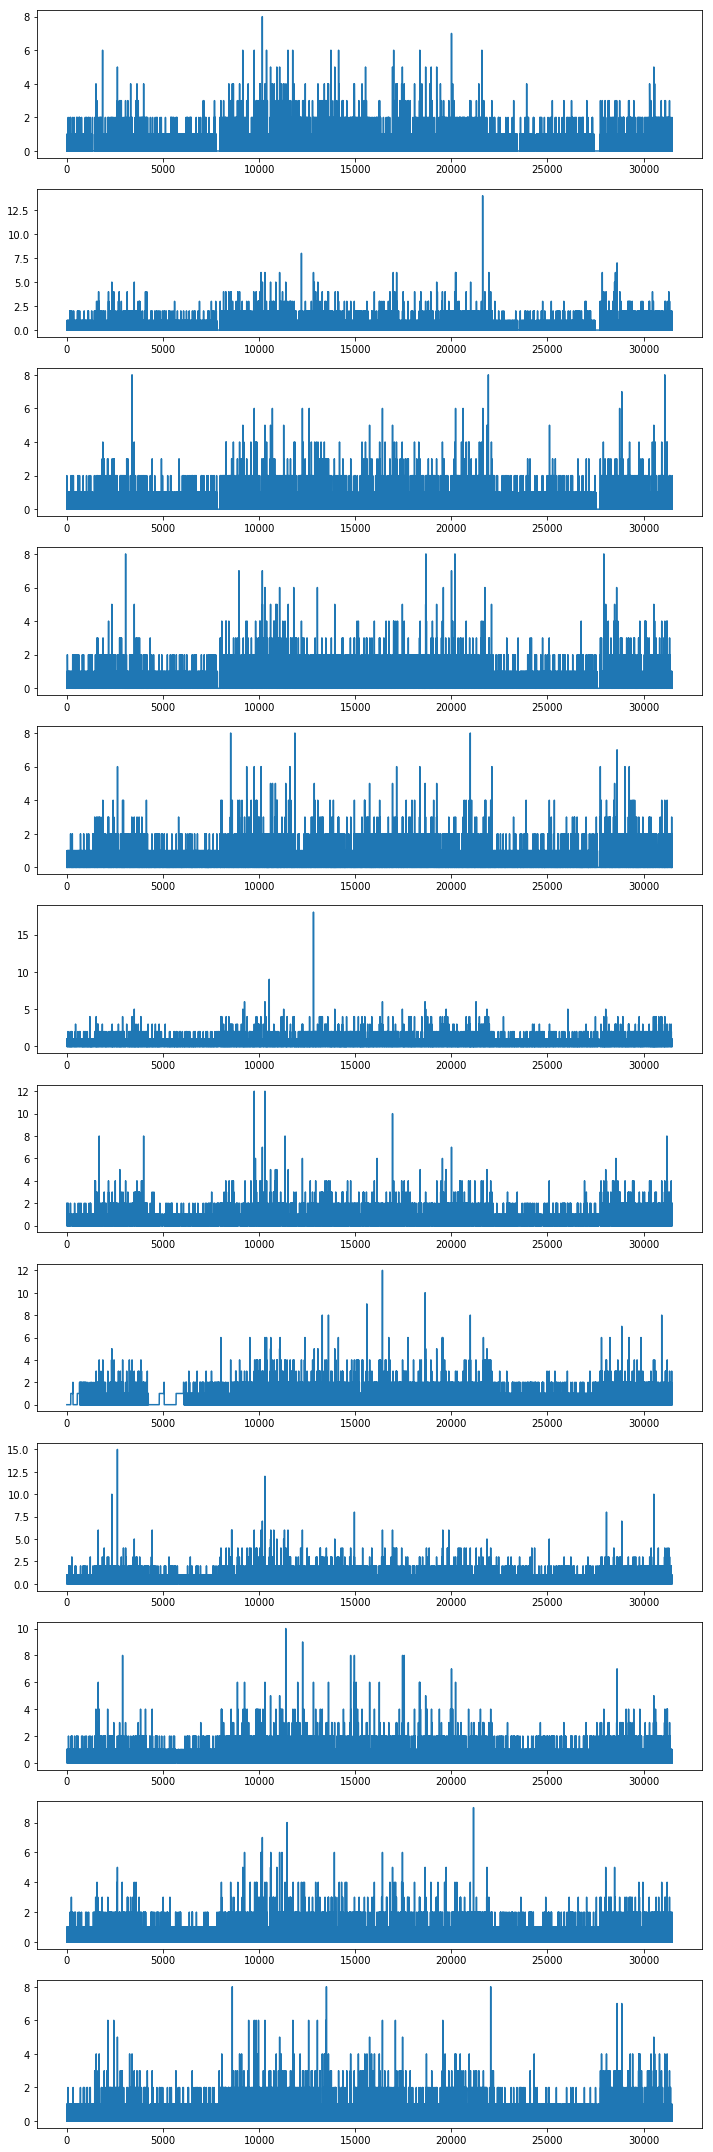

In [77]:
print(col_list[t])
fig,ax = plt.subplots(nrows=12,ncols=1,figsize=(10,30))
t = start
for i in range(12):
#         temp = data.groupby(col_list[start:start+12][t])['Retention Status'].mean()
#     print("*"*25)
#     print(temp)
#     sns.distplot(data[col_list[t]],ax=ax[i])#[i%4][j%3])
    ax[i].plot(data[col_list[t]])
    t += 1
plt.tight_layout()
plt.show()
start = t

Inquiry_Done_12


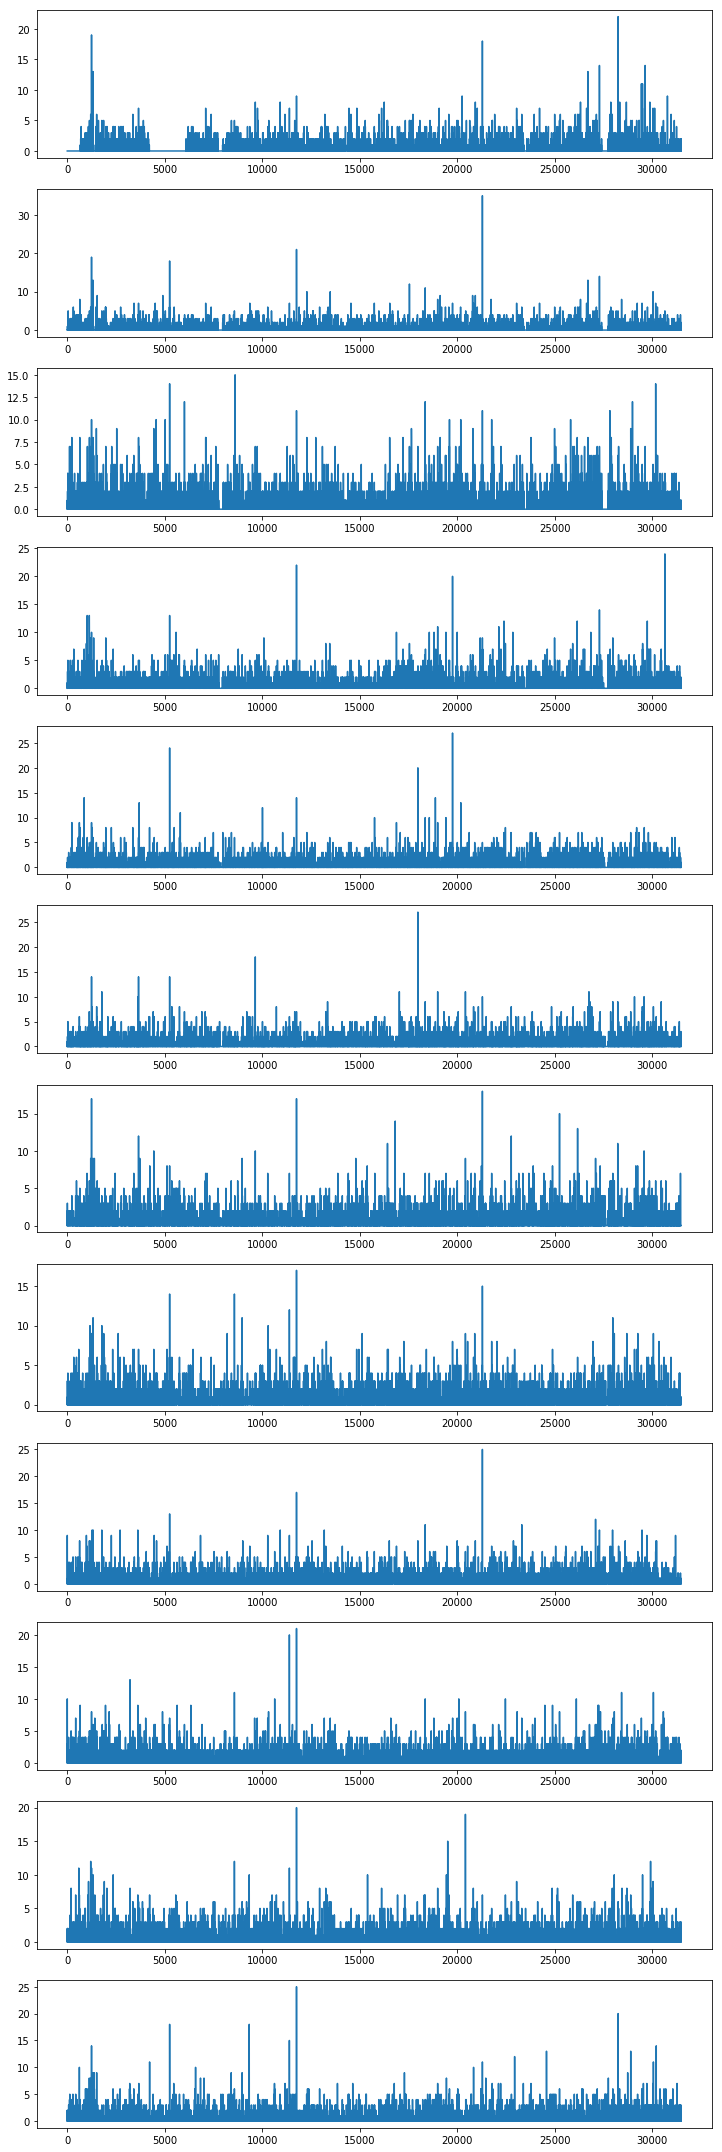

In [78]:
print(col_list[t])
fig,ax = plt.subplots(nrows=12,ncols=1,figsize=(10,30))
t = start
for i in range(12):
#         temp = data.groupby(col_list[start:start+12][t])['Retention Status'].mean()
#     print("*"*25)
#     print(temp)
#     sns.distplot(data[col_list[t]],ax=ax[i])#[i%4][j%3])
    ax[i].plot(data[col_list[t]])
    t += 1
plt.tight_layout()
plt.show()
start = t

Inquiry_Done_0


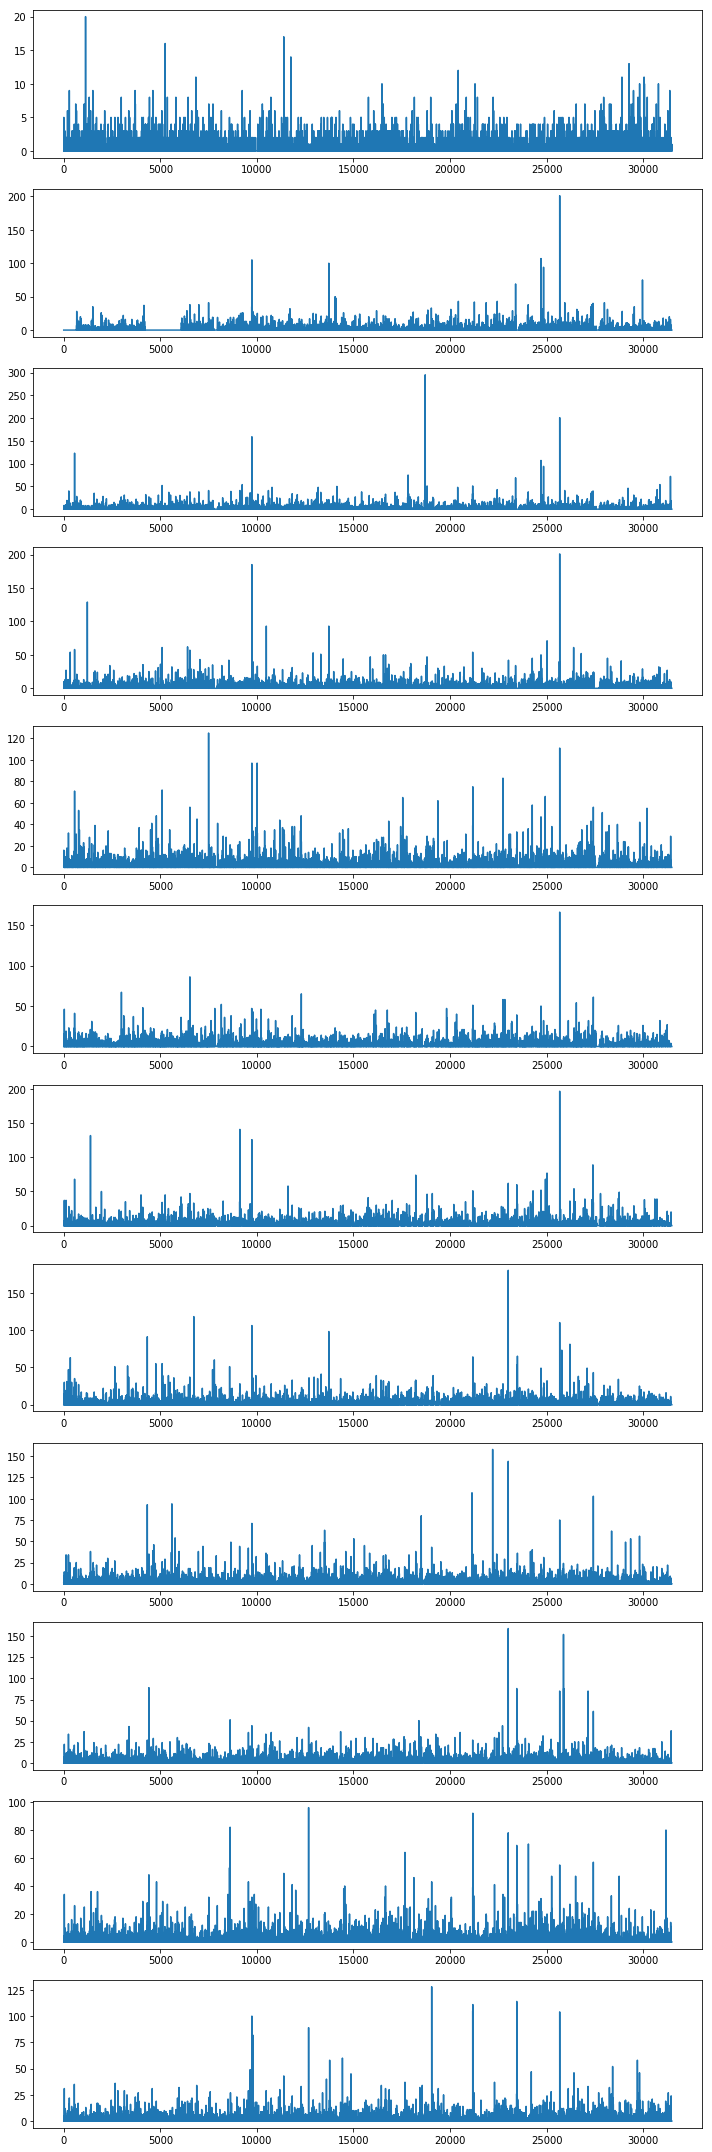

In [79]:
print(col_list[t])
fig,ax = plt.subplots(nrows=12,ncols=1,figsize=(10,30))
t = start
for i in range(12):
#         temp = data.groupby(col_list[start:start+12][t])['Retention Status'].mean()
#     print("*"*25)
#     print(temp)
#     sns.distplot(data[col_list[t]],ax=ax[i])#[i%4][j%3])
    ax[i].plot(data[col_list[t]])
    t += 1
plt.tight_layout()
plt.show()
start = t

View_Peer_1


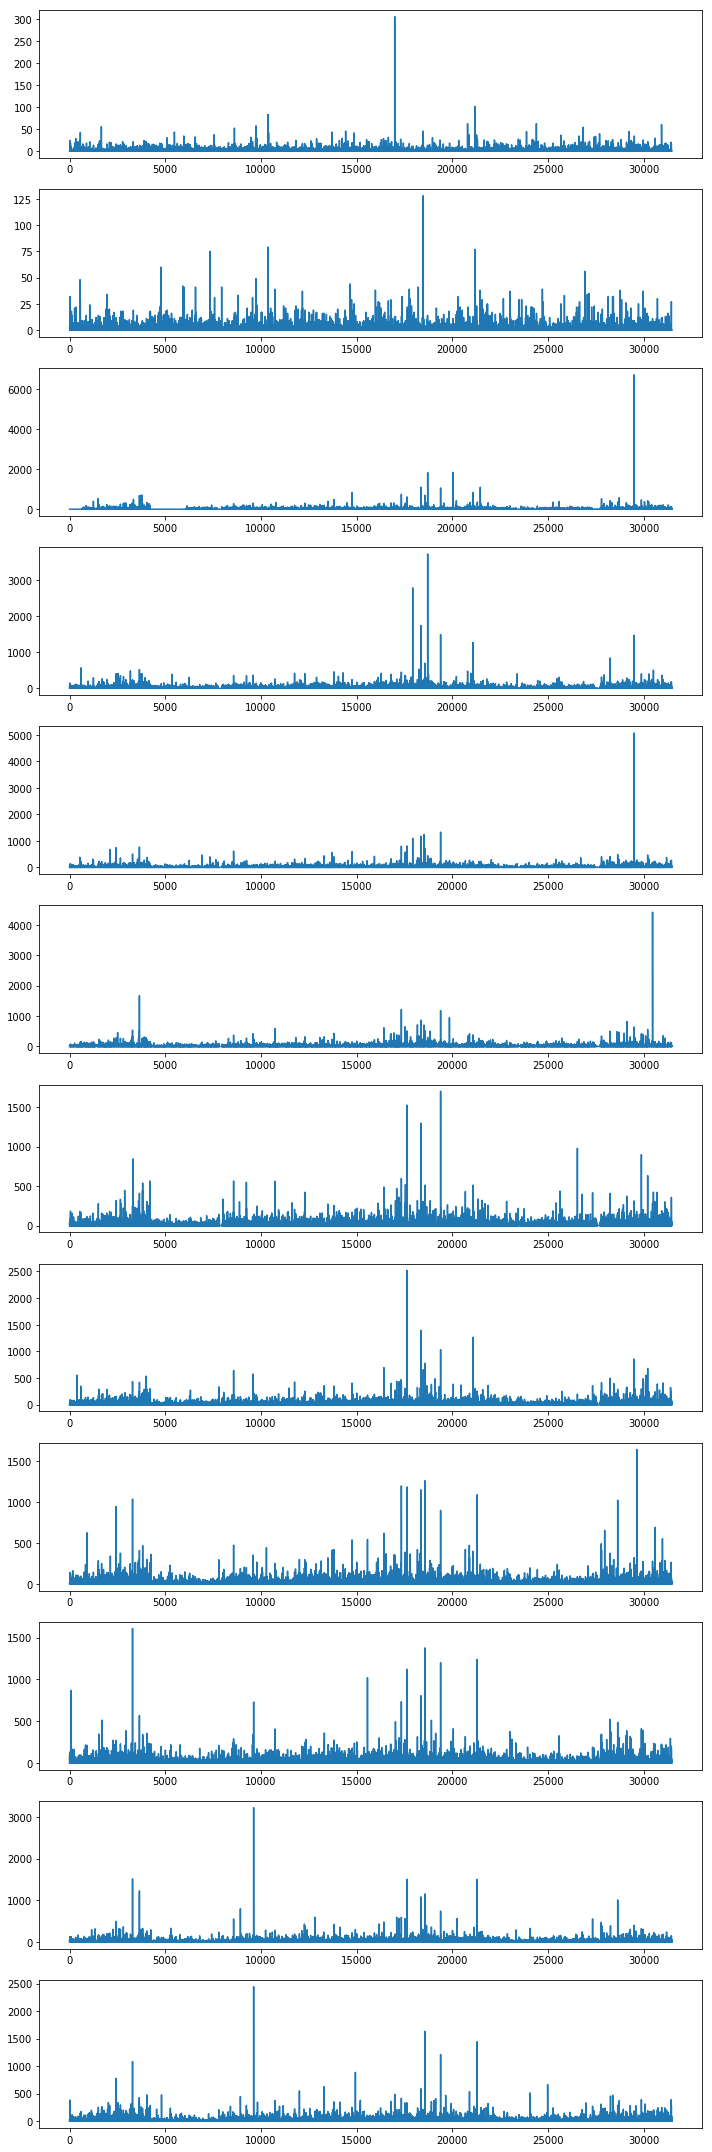

In [80]:
print(col_list[t])
fig,ax = plt.subplots(nrows=12,ncols=1,figsize=(10,30))
t = start
for i in range(12):
#         temp = data.groupby(col_list[start:start+12][t])['Retention Status'].mean()
#     print("*"*25)
#     print(temp)
#     sns.distplot(data[col_list[t]],ax=ax[i])#[i%4][j%3])
    ax[i].plot(data[col_list[t]])
    t += 1
plt.tight_layout()
plt.show()
start = t

Document_Read_2


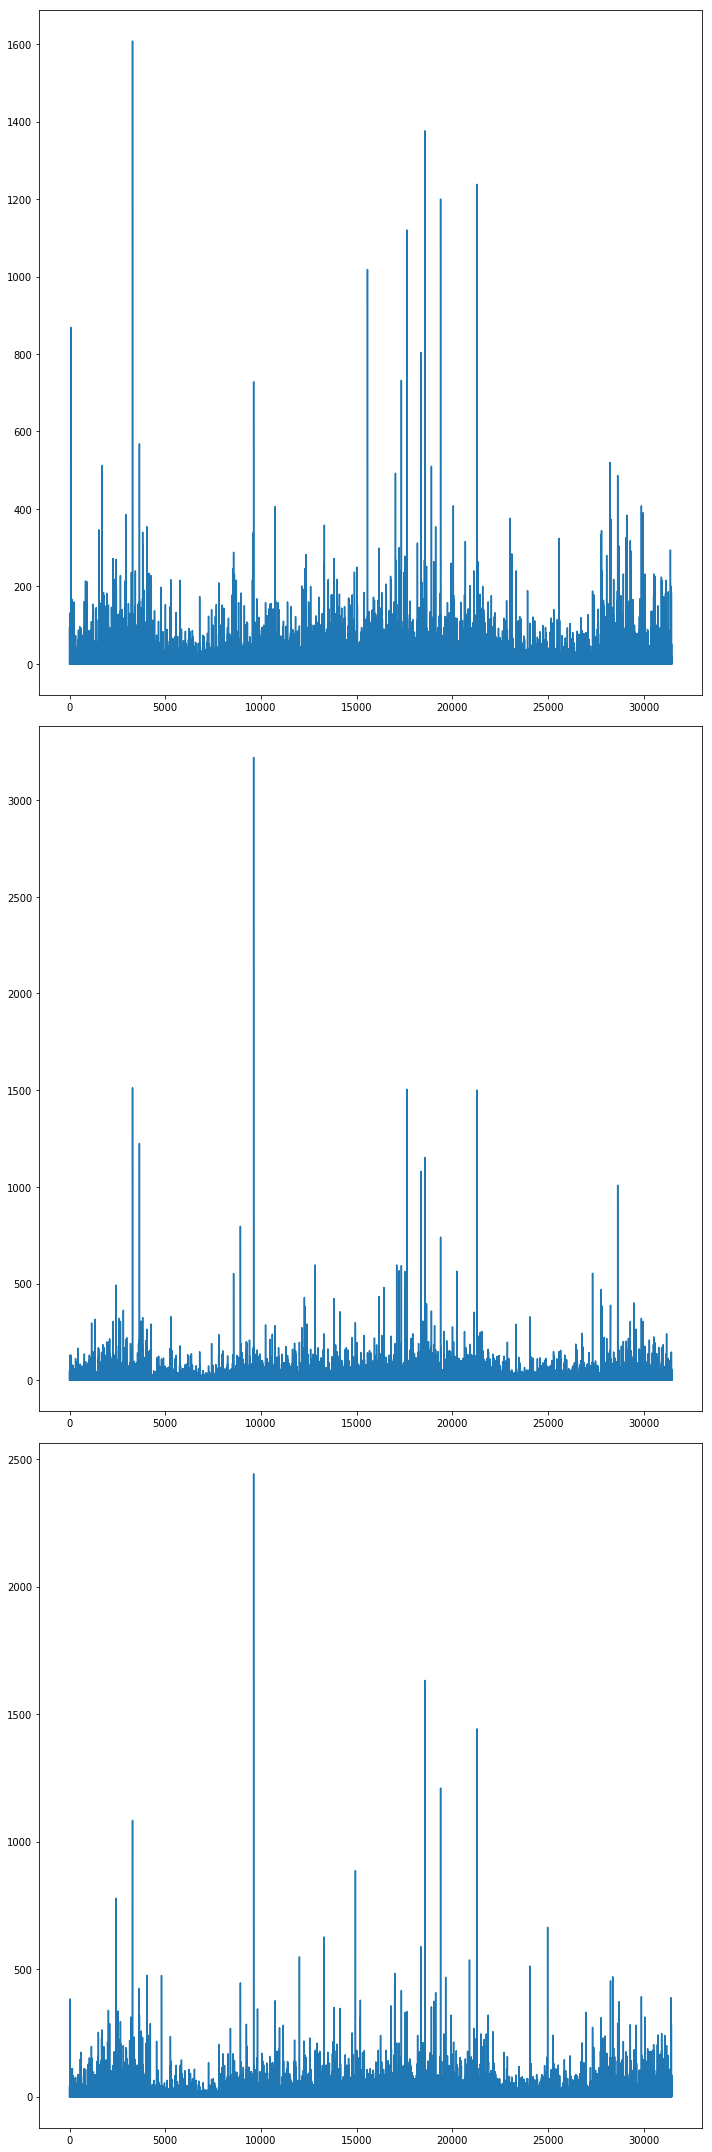

In [83]:
print(col_list[t-3])
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(10,30))
t = start-3
for i in range(3):
#         temp = data.groupby(col_list[start:start+12][t])['Retention Status'].mean()
#     print("*"*25)
#     print(temp)
#     sns.distplot(data[col_list[t]],ax=ax[i])#[i%4][j%3])
    ax[i].plot(data[col_list[t]])
    t += 1
plt.tight_layout()
plt.show()
start = t

# remove outlier

In [93]:
outlier_col = ['Service_desk_call_11', 'Service_desk_call_10', 'Service_desk_call_9',
       'Service_desk_call_8', 'Service_desk_call_7', 'Service_desk_call_6',
       'Service_desk_call_5', 'Service_desk_call_4', 'Service_desk_call_3',
       'Service_desk_call_2', 'Service_desk_call_1', 'Service_desk_call_0',
        'Inquiry_Done_12', 'Inquiry_Done_11', 'Inquiry_Done_10',
       'Inquiry_Done_9', 'Inquiry_Done_8', 'Inquiry_Done_7', 'Inquiry_Done_6',
       'Inquiry_Done_5', 'Inquiry_Done_4', 'Inquiry_Done_3', 'Inquiry_Done_2',
       'Inquiry_Done_1', 'Inquiry_Done_0',
        'View_Peer_12', 'View_Peer_11',
       'View_Peer_10', 'View_Peer_9', 'View_Peer_8', 'View_Peer_7',
       'View_Peer_6', 'View_Peer_5', 'View_Peer_4', 'View_Peer_3',
       'View_Peer_2', 'View_Peer_1', 'View_Peer_0',
        'Document_Read_12',
       'Document_Read_11', 'Document_Read_10', 'Document_Read_9',
       'Document_Read_8', 'Document_Read_7', 'Document_Read_6',
       'Document_Read_5', 'Document_Read_4', 'Document_Read_3',
       'Document_Read_2', 'Document_Read_1', 'Document_Read_0',]

In [94]:
for col in outlier_col:
    iqr1, iqr3 = np.percentile(data[col],(5,95))
    iqr = iqr3-iqr1
    low,high = iqr1 -1.5*iqr, iqr3+1.5*iqr
    print("*"*25)
    print(col)
    print(high, np.max(data[col]),np.where(data[col]>high)[0].shape)

*************************
Service_desk_call_11
2.5 8.0 (205,)
*************************
Service_desk_call_10
2.5 14.0 (202,)
*************************
Service_desk_call_9
2.5 8.0 (188,)
*************************
Service_desk_call_8
2.5 8.0 (236,)
*************************
Service_desk_call_7
2.5 8.0 (200,)
*************************
Service_desk_call_6
2.5 18.0 (201,)
*************************
Service_desk_call_5
2.5 12.0 (211,)
*************************
Service_desk_call_4
2.5 12.0 (288,)
*************************
Service_desk_call_3
2.5 15.0 (226,)
*************************
Service_desk_call_2
2.5 10.0 (204,)
*************************
Service_desk_call_1
2.5 9.0 (183,)
*************************
Service_desk_call_0
2.5 8.0 (203,)
*************************
Inquiry_Done_12
2.5 2.0 (0,)
*************************
Inquiry_Done_11
2.5 2.0 (0,)
*************************
Inquiry_Done_10
2.5 2.0 (0,)
*************************
Inquiry_Done_9
2.5 2.0 (0,)
*************************
Inquiry_Done_8


In [95]:
for col in outlier_col:
    iqr1, iqr3 = np.percentile(data[col],(5,95))
    iqr = iqr3-iqr1
    low,high = iqr1 -1.5*iqr, iqr3+1.5*iqr
    data[col] = np.where(data[col]>high,0,data[col])

In [96]:
data.to_csv('cleaned_no_outlier.csv',index=False)

In [110]:
for col in data.columns:
    print(col)

1:1_Meeting_0
1:1_Meeting_1
1:1_Meeting_10
1:1_Meeting_11
1:1_Meeting_2
1:1_Meeting_3
1:1_Meeting_4
1:1_Meeting_5
1:1_Meeting_6
1:1_Meeting_7
1:1_Meeting_8
1:1_Meeting_9
Conference_Attended_0
Conference_Attended_1
Conference_Attended_10
Conference_Attended_11
Conference_Attended_2
Conference_Attended_3
Conference_Attended_4
Conference_Attended_5
Conference_Attended_6
Conference_Attended_7
Conference_Attended_8
Conference_Attended_9
Conference_Attended_Flag(Y/N)
Contract Multi-Year (Y/N)
Document_Read_0
Document_Read_1
Document_Read_10
Document_Read_11
Document_Read_12
Document_Read_2
Document_Read_3
Document_Read_4
Document_Read_5
Document_Read_6
Document_Read_7
Document_Read_8
Document_Read_9
Document_Read_Last120_Flag (Y/N)
Inquiry Eligible Flag (Y/N)
Inquiry_Done_0
Inquiry_Done_1
Inquiry_Done_10
Inquiry_Done_11
Inquiry_Done_12
Inquiry_Done_2
Inquiry_Done_3
Inquiry_Done_4
Inquiry_Done_5
Inquiry_Done_6
Inquiry_Done_7
Inquiry_Done_8
Inquiry_Done_9
Inquiry_Done_Last120_Flag (Y/N)
Multi 

In [106]:
data = data.drop('test',axis=1)

In [109]:
data['Transaction Year-month'].unique()

array([201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708,
       201709, 201710, 201711, 201712, 201801, 201802, 201610, 201611,
       201612, 201803, 201804])

In [111]:
col_list = ['Testimonial_11',
       'Testimonial_10', 'Testimonial_9', 'Testimonial_8', 'Testimonial_7',
       'Testimonial_6', 'Testimonial_5', 'Testimonial_4', 'Testimonial_3',
       'Testimonial_2', 'Testimonial_1', 'Testimonial_0', 
        '1:1_Meeting_11',
       '1:1_Meeting_10', '1:1_Meeting_9', '1:1_Meeting_8', '1:1_Meeting_7',
       '1:1_Meeting_6', '1:1_Meeting_5', '1:1_Meeting_4', '1:1_Meeting_3',
       '1:1_Meeting_2', '1:1_Meeting_1', '1:1_Meeting_0',
        'Symposium_Attended_11', 'Symposium_Attended_10',
       'Symposium_Attended_9', 'Symposium_Attended_8', 'Symposium_Attended_7',
       'Symposium_Attended_6', 'Symposium_Attended_5', 'Symposium_Attended_4',
       'Symposium_Attended_3', 'Symposium_Attended_2', 'Symposium_Attended_1',
       'Symposium_Attended_0',
       'Conference_Attended_11', 'Conference_Attended_10',
       'Conference_Attended_9', 'Conference_Attended_8',
       'Conference_Attended_7', 'Conference_Attended_6',
       'Conference_Attended_5', 'Conference_Attended_4',
       'Conference_Attended_3', 'Conference_Attended_2',
       'Conference_Attended_1', 'Conference_Attended_0',
        'Service_desk_call_11', 'Service_desk_call_10', 'Service_desk_call_9',
       'Service_desk_call_8', 'Service_desk_call_7', 'Service_desk_call_6',
       'Service_desk_call_5', 'Service_desk_call_4', 'Service_desk_call_3',
       'Service_desk_call_2', 'Service_desk_call_1', 'Service_desk_call_0',
        'Inquiry_Done_12', 'Inquiry_Done_11', 'Inquiry_Done_10',
       'Inquiry_Done_9', 'Inquiry_Done_8', 'Inquiry_Done_7', 'Inquiry_Done_6',
       'Inquiry_Done_5', 'Inquiry_Done_4', 'Inquiry_Done_3', 'Inquiry_Done_2',
       'Inquiry_Done_1', 'Inquiry_Done_0',
        'View_Peer_12', 'View_Peer_11',
       'View_Peer_10', 'View_Peer_9', 'View_Peer_8', 'View_Peer_7',
       'View_Peer_6', 'View_Peer_5', 'View_Peer_4', 'View_Peer_3',
       'View_Peer_2', 'View_Peer_1', 'View_Peer_0',
        'Document_Read_12',
       'Document_Read_11', 'Document_Read_10', 'Document_Read_9',
       'Document_Read_8', 'Document_Read_7', 'Document_Read_6',
       'Document_Read_5', 'Document_Read_4', 'Document_Read_3',
       'Document_Read_2', 'Document_Read_1', 'Document_Read_0',]

In [112]:
for col in col_list:
    data[col+'_mean_encode'] = data[col].map(data.groupby(col)['Retention Status'].mean())

In [113]:
data.shape

(31485, 215)

In [114]:
data.dtypes

1:1_Meeting_0                    float64
1:1_Meeting_1                    float64
1:1_Meeting_10                   float64
1:1_Meeting_11                   float64
1:1_Meeting_2                    float64
1:1_Meeting_3                    float64
1:1_Meeting_4                    float64
1:1_Meeting_5                    float64
1:1_Meeting_6                    float64
1:1_Meeting_7                    float64
1:1_Meeting_8                    float64
1:1_Meeting_9                    float64
Conference_Attended_0            float64
Conference_Attended_1            float64
Conference_Attended_10           float64
Conference_Attended_11           float64
Conference_Attended_2            float64
Conference_Attended_3            float64
Conference_Attended_4            float64
Conference_Attended_5            float64
Conference_Attended_6            float64
Conference_Attended_7            float64
Conference_Attended_8            float64
Conference_Attended_9            float64
Conference_Atten

In [115]:
for index,col in enumerate(data.dtypes):
    if col == np.int64:
#         print(data.columns[index])
        data[data.columns[index]] = data[data.columns[index]].astype('int16')
    if col == np.float64:
        data[data.columns[index]] = data[data.columns[index]].astype('float16')

In [116]:
data.dtypes

1:1_Meeting_0                    float16
1:1_Meeting_1                    float16
1:1_Meeting_10                   float16
1:1_Meeting_11                   float16
1:1_Meeting_2                    float16
1:1_Meeting_3                    float16
1:1_Meeting_4                    float16
1:1_Meeting_5                    float16
1:1_Meeting_6                    float16
1:1_Meeting_7                    float16
1:1_Meeting_8                    float16
1:1_Meeting_9                    float16
Conference_Attended_0            float16
Conference_Attended_1            float16
Conference_Attended_10           float16
Conference_Attended_11           float16
Conference_Attended_2            float16
Conference_Attended_3            float16
Conference_Attended_4            float16
Conference_Attended_5            float16
Conference_Attended_6            float16
Conference_Attended_7            float16
Conference_Attended_8            float16
Conference_Attended_9            float16
Conference_Atten

In [117]:
data.to_csv('cleaned_no_oulier_mean_encoding_dtype_16.csv',index=False)